# Song Recommender
### by Madeline Spetz

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Get the data

I am using a dataset of all of the song features of the Billboard Top 100 Hits from 1958 to 2019.  The features can be pulled from the Spotify API using spotipy plug-in, but in this case the dataset has already done that for each of the Billboard Top Hits.

In addition to artist, song title, album, and genre, Spotify has a lot of numerical descriptions of each song:
 - Key
 - Time signature
 - Tempo (BPM)
 - Danceability
   - a measure of how danceable a song is
   - rhythm, stability, regularity
   - 0 = least danceable, 1 = most danceable
 - Energy
   - intensity and activity
   - 0 = least energetic, 1 = most energetic
 - Speechiness
   - prescence of spoken word
   - 0 = music, 1 = dialogue
 - Acousticness
   - 0 = not acoustic, 1 = acoustic
 - Instrumentalness
   - whether a track contains any vocals
   - 0 = vocal heavy, 1 = no vocals
 - Valence
   - postivity
   - 0 = sad, depressed, angry, 1 = happy, cheerful, euphoric
   
   
 ## 2) Provide a link to the data
 The dataset I used can be found here: https://data.world/kcmillersean/billboard-hot-100-1958-2017
 In addition, Spotify's API with descriptions of each song feature can be found here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/
 
 ## 3) Import the data

In [5]:
raw_songs = pd.read_csv('/Users/spetzmr/Desktop/Hot 100 Audio Features.csv')

## 4) Show the head of the data

In [6]:
raw_songs.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),False,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,False,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,True,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,True,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


There are a lot of columns here that I'm not really interested in. I'm going to drop the most cumbersome ones I know I won't need, like the SongID (which is a concated Song and Performer), spotity_track_id, and spotify_track_preview_url.  Here is the slightly cleaned-up data set I'll be working with for now and the head of the clean data:

In [7]:
songs = raw_songs.drop(columns = ['SongID', 'spotify_track_id', 'spotify_track_preview_url'])

In [8]:
songs.head()

,Performer,Song,spotify_genre,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],Adicto (with Anuel AA & Ozuna),False,270740.0,91.0,0.734,0.836,10.0,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0
1,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",A Star Is Born Soundtrack,False,215733.0,88.0,0.572,0.385,7.0,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0
3,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",Hollywood's Bleeding,True,196760.0,86.0,0.542,0.674,6.0,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0
4,"Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",Bacc At It Again,True,228185.0,61.0,0.948,0.623,8.0,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0


Now,

## 6) Show the shape of the data

In [9]:
songs.shape

(28492, 19)

This is a huge dataset - it includes almost 29,000 songs.

## 7) Problem Statement

I've been staying at my parents' house for the last month or so, along with all my siblings.  My 13-year-old brother had apparently become very into playing the guitar in my abscence, and he's always asking for suggestions for what to play next.  The rest of my family (myself included) doesn't know much of anything about music, so this is becoming a difficult request.  I wanted to be able to build a recommendation system that would give an output of songs that are musically similar to what the song you input (the idea is that the inputted song would be one Michael already knows how to play).

First, I'll recommend songs in the most basic way I can think of - simply by popularity.  Spotify has a metric for this too, given as a number between 1 to 100.  I'll just get back the 10 most popular songs.

In [10]:
#rank by current popularity first - most basic recommendation

popular_songs = songs.sort_values('spotify_track_popularity', ascending = False)
popular_songs.head(10)

,Performer,Song,spotify_genre,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
21,Tones And I,Dance Monkey,['australian pop'],Dance Monkey (Stripped Back) / Dance Monkey,False,209438.0,100.0,0.824,0.588,6.0,-6.400,0.0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,4.0
341,Arizona Zervas,Roxanne,['pop rap'],ROXANNE,True,163636.0,99.0,0.621,0.601,6.0,-5.616,0.0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,5.0
363,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",Hollywood's Bleeding,False,215280.0,98.0,0.695,0.762,0.0,-3.497,1.0,0.0395,0.1920,0.002440,0.0863,0.553,120.042,4.0
401,Maroon 5,Memories,"['pop', 'pop rock']",Memories,False,189486.0,98.0,0.764,0.320,11.0,-7.209,1.0,0.0546,0.8370,0.000000,0.0822,0.575,91.019,4.0
115,Billie Eilish,everything i wanted,"['electropop', 'pop']",everything i wanted,False,245425.0,97.0,0.704,0.225,6.0,-14.454,0.0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,4.0
18857,Mariah Carey,All I Want For Christmas Is You,"['dance pop', 'pop', 'r&b', 'urban contemporary']",Merry Christmas,False,241106.0,97.0,0.335,0.625,7.0,-7.462,1.0,0.0386,0.1640,0.000000,0.0708,0.346,150.277,4.0
161,Trevor Daniel,Falling,"['alternative r&b', 'melodic rap']",Falling,False,159381.0,97.0,0.784,0.430,10.0,-8.756,0.0,0.0364,0.1230,0.000000,0.0887,0.236,127.087,4.0
290,Karol G & Nicki Minaj,Tusa,"['latin', 'reggaeton']",Tusa,False,200960.0,97.0,0.803,0.715,2.0,-3.280,1.0,0.2980,0.2950,0.000134,0.0574,0.574,101.085,4.0
71,Dua Lipa,Don't Start Now,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",Don't Start Now,False,183290.0,97.0,0.794,0.793,11.0,-4.521,0.0,0.0842,0.0125,0.000000,0.0952,0.677,123.941,4.0
420,Billie Eilish,Bad Guy,"['electropop', 'pop']",WHEN WE ALL FALL ASLEE,False,194087.0,96.0,0.701,0.425,7.0,-10.965,1.0,0.3750,0.3280,0.130000,0.1000,0.562,135.128,4.0


(95, 100)

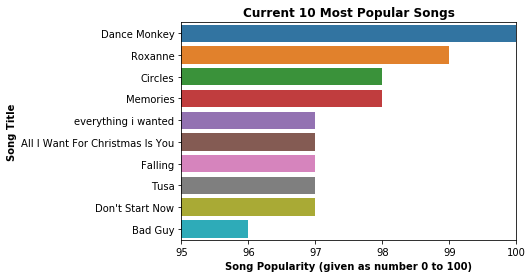

In [11]:
#bar plot of 10 most popular songs

popular_songs_fig = sns.barplot(x=popular_songs['spotify_track_popularity'].head(10), y=popular_songs['Song'].head(10))
popular_songs_fig.set_title('Current 10 Most Popular Songs', weight='bold')
popular_songs_fig.set_xlabel('Song Popularity (given as number 0 to 100)', weight='bold')
popular_songs_fig.set_ylabel('Song Title', weight='bold')
plt.xlim(95,100)

This does work, and as we can see from the bar plot, these songs clearly have high popularilty. But what I notice about this collection of songs is that the Spotify metric of popularity is *current* popularity. It won't ever report back The Beatles, for instance.  But for my classic rock-loving, acoustic guitar-playing brother, this isn't exactly what I want.

In particular, he's a big Stones fan, so I'll start there.  What does the data look like if I just take songs by The Rolling Stones.

In [12]:
rolling_stones = popular_songs.loc[popular_songs['Performer'] == 'The Rolling Stones']
rolling_stones.shape

(57, 19)

Looks like there are 57 Stones songs in this list.  That doesn't really help me much. It's no different than just searching for The Rolling Stones on the Spotify app itself. Also, it doesn't take into account any features of songs by other artists that might be good for him to play based on musical similarities.

Looking closer at the Spotify features, it looks like speechiness and acousticness might be important in finding a good song. It seems like high acousticness and low speechiness would define a good guitar song. Let's study what those two features look like in the set of songs that are by The Rolling Stones.

Text(0, 0.5, 'Acousticness')

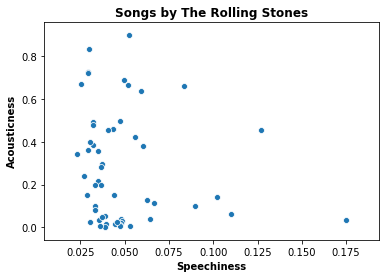

In [13]:
rolling_stones_fig = sns.scatterplot(x=rolling_stones['speechiness'], y=rolling_stones['acousticness'])
rolling_stones_fig.set_title('Songs by The Rolling Stones', weight='bold')
rolling_stones_fig.set_xlabel('Speechiness', weight='bold')
rolling_stones_fig.set_ylabel('Acousticness', weight='bold')

That doesn't really help too much. It looks like most entries are quite low in speechiness, which is to be expected since I already know they are all songs. The acousticness doesn't seem to be as defined of a cut-off as I was hoping for. Plenty of songs have a fairly low acousticness measure, even though I also already know that many Stones songs sound good on the guitar.

I'm going to need a more sophisticated way to tell if songs are similar musically, ideally one that takes into account more, or all, of the Spotify features.

I'm going to start with Michael's current favorite song to play, Get Off Of My Cloud by The Rolling Stones, and try to find other songs in the dataset that are musically similar.

In [14]:
#Pull just row for Get Off Of My Cloud

cloud_song = songs.loc[songs['Song'] == "Get Off Of My Cloud"]
cloud_song.head()

,Performer,Song,spotify_genre,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
11636,The Rolling Stones,Get Off Of My Cloud,"['album rock', 'british invasion', 'classic ro...",December’s Children (And Everybody’s),False,175080.0,56.0,0.579,0.877,4.0,-8.83,1.0,0.0488,0.0289,0.571,0.0656,0.9,126.336,4.0


I'm going to use the values of each of these features for this particular song to search for similar songs.

In [15]:
# set target values of features based on Get Off Of My Cloud

artist = 'The Rolling Stones'
key_target = 4.0
tempo_target = 126
danceability_target = 0.579
energy_target = 0.877
speechiness_target = 0.0488
acousticness_target = 0.0289
instrumentalness_target = 0.571
valence_target = 0.9
time_signature_target = 4.0

I'm going to create a scoring system, where for each attribute that's similar to Get Off Of My cloud, a song in the dataset gets 10 points.  The most similar songs musically will have the highest Score.

For artist, key, and time signature, I want an exact match to Get Off Of m for a song to get 10 points.  For the other features I'm interested in (tempo, danceability, energy, speechiness, acousticness, instrumentalness, and valence), I just want it to be similar. We'll go with +10 or -10 beats per minute for Tempo.  And +0.1 or -0.1 for the other features since they're all in the range from 0 to 1.

In [16]:
k = 1

#use for loop with nested if statements to 
#iterate over dataframe and compare each feature 
# to the value of that feature for Get Off Of My Cloud

for ind, row in songs.iterrows() :
    score = 0

    #Same artist
    if row['Performer'] == artist :
        score = score + 10
    else :
        score = score + 0
    
    #Key
    if row['key'] == key_target :
        score = score + 10
    else :
        score = score + 0
        
    #Time Signature
    if row['time_signature'] == time_signature_target :
        score = score + 10
    else :
        score = score + 0
    
    #Tempo
    tempo_low = tempo_target - 10
    tempo_high = tempo_target + 10
    
    if row['tempo'] >= tempo_low and row['tempo'] <= tempo_high :
        score = score + 10
    else :
        score = score + 0
    
    #Danceability
    danceability_low = danceability_target - 0.1
    danceability_high = danceability_target + 0.1
    
    if row['danceability'] >= danceability_low and row['danceability'] <= danceability_high :
        score = score + 10
    else :
        score = score + 0
        
    #Energy
    energy_low = energy_target - 0.1
    energy_high = energy_target + 0.1
    
    if row['energy'] >= energy_low and row['energy'] <= energy_high :
        score = score + 10
    else :
        score = score + 0
    
    #Speechiness
    speechiness_low = speechiness_target - 0.1
    speechiness_high = speechiness_target + 0.1
    
    if row['speechiness'] >= speechiness_low and row['speechiness'] <= speechiness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Acousticness
    acousticness_low = acousticness_target - 0.1
    acousticness_high = acousticness_target + 0.1
    
    if row['acousticness'] >= acousticness_low and row['acousticness'] <= acousticness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Instrumentalness
    instrumentalness_low = instrumentalness_target - 0.1
    instrumentalness_high = instrumentalness_target + 0.1
    
    if row['instrumentalness'] >= instrumentalness_low and row['instrumentalness'] <= instrumentalness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Valence
    valence_low = valence_target - 0.1
    valence_high = valence_target + 0.1
    
    if row['valence'] >= valence_low and row['valence'] <= valence_high :
        score = score + 10
    else :
        score = score + 0
        
    if score >= 80 :
        print(str(k), '. ', row['Song'], ' by ', row['Performer'], str(score))
        k = k + 1

1 .  The Ballad Of John And Yoko  by  The Beatles 80
2 .  She's Kinda Hot  by  5 Seconds Of Summer 80
3 .  Fast As You  by  Dwight Yoakam 80
4 .  19th Nervous Breakdown  by  The Rolling Stones 80
5 .  Photograph  by  Def Leppard 80
6 .  Keep Playin' That Rock 'N' Roll  by  Edgar Winter's White Trash 80
7 .  Get Outta My Dreams, Get Into My Car  by  Billy Ocean 80
8 .  Not Fade Away  by  The Rolling Stones 80
9 .  Start Me Up  by  The Rolling Stones 80
10 .  Ain't Too Proud To Beg  by  The Rolling Stones 80
11 .  1985  by  Bowling For Soup 80
12 .  Get Off Of My Cloud  by  The Rolling Stones 100
13 .  Rock And A Hard Place  by  The Rolling Stones 80
14 .  Happy  by  The Rolling Stones 80
15 .  Heaven Is A Place On Earth  by  Belinda Carlisle 80
16 .  Badlands  by  Bruce Springsteen 80
17 .  Cuts You Up  by  Peter Murphy 80
18 .  Reap The Wild Wind  by  Ultravox 80
19 .  Strangelove  by  Depeche Mode 80
20 .  BB Good  by  Jonas Brothers 80
21 .  Piece By Piece  by  The Tubes 80
22 .  Roa

Yay! If I say I want 8 out of the 10 features I looked at to be similar, I get back 28 songs that are musically similar. Several of them are also by The Rolling Stones, which is to be expected since I made that one of my features, but there are also a lot of other songs. It creates a really interesting list, actually. I wouldn't normally think of some of these songs as similar to The Rolling Stones, but according to the Spotify features, they muscially are similar.

I want to make one more refinement. Some of the features, like acousticness (as we saw in the Rolling Stones scatterplot) have a wide range.  Others, like speechiness, have a really narrow range. I want to look at the range and mean of each of these features and change the error value of them accordingly in order to weigh the features a little more evenly. (But I'll leave Artist, Key, and Time Signature as is, since those are exact matches.)

In [17]:
#Print the range and mean of each relevant feature

#Tempo
tempo_min = songs['tempo'].min()
tempo_max = songs['tempo'].max()
print('Tempo range: ', (tempo_max - tempo_min))
print('Tempo mean: ', songs['tempo'].mean())

#Danceability
danceability_min = songs['danceability'].min()
danceability_max = songs['danceability'].max()
print('Danceability range: ', (danceability_max - danceability_min))
print('Danceability mean: ', songs['danceability'].mean())

#Energy
energy_min = songs['energy'].min()
energy_max = songs['energy'].max()
print('Energy range: ', (energy_max - energy_min))
print('Energy mean: ', songs['energy'].mean())

#Speechiness
speechiness_min = songs['speechiness'].min()
speechiness_max = songs['speechiness'].max()
print('Speechiness range: ', (speechiness_max - speechiness_min))
print('Speechiness mean: ', songs['speechiness'].mean())

#Acousticness
acousticness_min = songs['acousticness'].min()
acousticness_max = songs['acousticness'].max()
print('Acousticness range: ', (acousticness_max - acousticness_min))
print('Acousticness mean: ', songs['acousticness'].mean())

#Instrumentalness
instrumentalness_min = songs['acousticness'].min()
instrumentalness_max = songs['acousticness'].max()
print('Instrumentalness range: ', (instrumentalness_max - instrumentalness_min))
print('Instrumentalness mean: ', songs['instrumentalness'].mean())

#Valence
valence_min = songs['valence'].min()
valence_max = songs['valence'].max()
print('Valence range: ', (valence_max - valence_min))
print('Valence mean: ', songs['valence'].mean())

Tempo range:  241.00900000000001
Tempo mean:  120.19797837837783
Danceability range:  0.988
Danceability mean:  0.5983181165540584
Energy range:  0.9964189999999999
Energy mean:  0.6181003116976352
Speechiness range:  0.951
Speechiness mean:  0.07180958614864902
Acousticness range:  0.99099749
Acousticness mean:  0.29604010653716134
Instrumentalness range:  0.99099749
Instrumentalness mean:  0.03324995983361501
Valence range:  0.991
Valence mean:  0.6052542060810789


Tempo looks like mean falls right in the middle of the range. We'll stick with +10 or -10 beats per minute from the inputted song's tempo.

Danceability, Energy, and Valence all look pretty similar. We'll stick with +0.1 or -0.1 for those three.

Speechiness, acousticness, and instrumentalness look a little different.  The mean is definitely on the low side of the mean.
For speechiness and instrumentalness, let's try +0.01 and -0.01.
For acousticness, we can do +0.05 and -0.05.

In [18]:
k = 1

#use same for loop, just change the +/- values within each feature

for ind, row in songs.iterrows() :
    score = 0

    #Same artist
    if row['Performer'] == artist :
        score = score + 10
    else :
        score = score + 0
    
    #Key
    if row['key'] == key_target :
        score = score + 10
    else :
        score = score + 0
        
    #Time Signature
    if row['time_signature'] == time_signature_target :
        score = score + 10
    else :
        score = score + 0
    
    #Tempo
    tempo_low = tempo_target - 10
    tempo_high = tempo_target + 10
    
    if row['tempo'] >= tempo_low and row['tempo'] <= tempo_high :
        score = score + 10
    else :
        score = score + 0
    
    #Danceability
    danceability_low = danceability_target - 0.1
    danceability_high = danceability_target + 0.1
    
    if row['danceability'] >= danceability_low and row['danceability'] <= danceability_high :
        score = score + 10
    else :
        score = score + 0
        
    #Energy
    energy_low = energy_target - 0.1
    energy_high = energy_target + 0.1
    
    if row['energy'] >= energy_low and row['energy'] <= energy_high :
        score = score + 10
    else :
        score = score + 0
    
    #Speechiness
    speechiness_low = speechiness_target - 0.01
    speechiness_high = speechiness_target + 0.01
    
    if row['speechiness'] >= speechiness_low and row['speechiness'] <= speechiness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Acousticness
    acousticness_low = acousticness_target - 0.05
    acousticness_high = acousticness_target + 0.05
    
    if row['acousticness'] >= acousticness_low and row['acousticness'] <= acousticness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Instrumentalness
    instrumentalness_low = instrumentalness_target - 0.01
    instrumentalness_high = instrumentalness_target + 0.01
    
    if row['instrumentalness'] >= instrumentalness_low and row['instrumentalness'] <= instrumentalness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Valence
    valence_low = valence_target - 0.1
    valence_high = valence_target + 0.1
    
    if row['valence'] >= valence_low and row['valence'] <= valence_high :
        score = score + 10
    else :
        score = score + 0
        
    if score >= 80 :
        print(str(k), '. ', row['Song'], ' by ', row['Performer'], str(score))
        k = k + 1

1 .  19th Nervous Breakdown  by  The Rolling Stones 80
2 .  Get Outta My Dreams, Get Into My Car  by  Billy Ocean 80
3 .  Start Me Up  by  The Rolling Stones 80
4 .  Ain't Too Proud To Beg  by  The Rolling Stones 80
5 .  Get Off Of My Cloud  by  The Rolling Stones 100
6 .  Rock And A Hard Place  by  The Rolling Stones 80
7 .  Cuts You Up  by  Peter Murphy 80
8 .  BB Good  by  Jonas Brothers 80
9 .  Piece By Piece  by  The Tubes 80


That definitely cuts it down, but now it's mostly just a list of songs by the same artist. Let's try one more time, if we only want 7 of the 10 to match.

In [19]:
k = 1

#use for loop with nested if statements to 
#iterate over dataframe and compare each feature 
# to the value of that feature for Get Off Of My Cloud

for ind, row in songs.iterrows() :
    score = 0

    #Same artist
    if row['Performer'] == artist :
        score = score + 10
    else :
        score = score + 0
    
    #Key
    if row['key'] == key_target :
        score = score + 10
    else :
        score = score + 0
        
    #Time Signature
    if row['time_signature'] == time_signature_target :
        score = score + 10
    else :
        score = score + 0
    
    #Tempo
    tempo_low = tempo_target - 10
    tempo_high = tempo_target + 10
    
    if row['tempo'] >= tempo_low and row['tempo'] <= tempo_high :
        score = score + 10
    else :
        score = score + 0
    
    #Danceability
    danceability_low = danceability_target - 0.1
    danceability_high = danceability_target + 0.1
    
    if row['danceability'] >= danceability_low and row['danceability'] <= danceability_high :
        score = score + 10
    else :
        score = score + 0
        
    #Energy
    energy_low = energy_target - 0.1
    energy_high = energy_target + 0.1
    
    if row['energy'] >= energy_low and row['energy'] <= energy_high :
        score = score + 10
    else :
        score = score + 0
    
    #Speechiness
    speechiness_low = speechiness_target - 0.01
    speechiness_high = speechiness_target + 0.01
    
    if row['speechiness'] >= speechiness_low and row['speechiness'] <= speechiness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Acousticness
    acousticness_low = acousticness_target - 0.05
    acousticness_high = acousticness_target + 0.05
    
    if row['acousticness'] >= acousticness_low and row['acousticness'] <= acousticness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Instrumentalness
    instrumentalness_low = instrumentalness_target - 0.01
    instrumentalness_high = instrumentalness_target + 0.01
    
    if row['instrumentalness'] >= instrumentalness_low and row['instrumentalness'] <= instrumentalness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Valence
    valence_low = valence_target - 0.1
    valence_high = valence_target + 0.1
    
    if row['valence'] >= valence_low and row['valence'] <= valence_high :
        score = score + 10
    else :
        score = score + 0
        
    if score >= 70 :
        print(str(k), '. ', row['Song'], ' by ', row['Performer'], str(score))
        k = k + 1

1 .  The Ballad Of John And Yoko  by  The Beatles 70
2 .  Guns For Hire  by  AC/DC 70
3 .  Our Lips Are Sealed  by  Go-Go's 70
4 .  American Storm  by  Bob Seger 70
5 .  She's Kinda Hot  by  5 Seconds Of Summer 70
6 .  Fast As You  by  Dwight Yoakam 70
7 .  Hyperactive  by  Robert Palmer 70
8 .  In A Moment  by  The Intrigues 70
9 .  Live While We're Young  by  One Direction 70
10 .  Ladies Love Country Boys  by  Trace Adkins 70
11 .  19th Nervous Breakdown  by  The Rolling Stones 80
12 .  Saturday  by  Rebecca Black & Dave Days 70
13 .  Point Of No Return  by  Expose 70
14 .  (Can't Live Without Your) Love And Affection  by  Nelson 70
15 .  Sweet Dreams  by  La Bouche 70
16 .  Photograph  by  Def Leppard 70
17 .  Every Beat Of My Heart  by  Crown Heights Affair 70
18 .  I'll Sleep When I'm Dead  by  Bon Jovi 70
19 .  Come As You Are  by  Nirvana 70
20 .  All About Tonight  by  Blake Shelton 70
21 .  Needles And Pins  by  The Searchers 70
22 .  It's Only Rock 'N Roll (But I Like It)  b

That pulls out way too many to be useful. Out of curiosity, let's pick one that has 7 matching features, but not 8 and manually compare it to Get Off Of My Cloud. We'll do Saturday by Rebecca Black, because it's definitely not something I would name as similar to The Rolling Stones.

In [20]:
saturday = songs.loc[songs['Song'] == 'Saturday']

comparison = [saturday, cloud_song]
comparison_df = pd.concat(comparison)
comparison_df.head()

,Performer,Song,spotify_genre,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
4617,Rebecca Black & Dave Days,Saturday,['post-teen pop'],Saturday,False,227775.0,36.0,0.703,0.810,4.0,-5.50,1.0,0.0393,0.0324,0.000217,0.1550,0.832,129.960,4.0
11636,The Rolling Stones,Get Off Of My Cloud,"['album rock', 'british invasion', 'classic ro...",December’s Children (And Everybody’s),False,175080.0,56.0,0.579,0.877,4.0,-8.83,1.0,0.0488,0.0289,0.571000,0.0656,0.900,126.336,4.0


Interestingly, it seems like the features they differ on, they differ on a lot - like instrumentalness. And even though these songs are clearly different, in key, time signature, tempo, energy, speechiness, acousticness, and valence they are almost the same.

Let's try one more time. First, I want to take out Artist as a consideration. Anyone can just look up songs by the same artist. Let's base it just on music features.

In [21]:
k = 1

#use for loop with nested if statements to 
#iterate over dataframe and compare each feature 
# to the value of that feature for Get Off Of My Cloud

for ind, row in songs.iterrows() :
    score = 0
    
    #Key
    if row['key'] == key_target :
        score = score + 10
    else :
        score = score + 0
        
    #Time Signature
    if row['time_signature'] == time_signature_target :
        score = score + 10
    else :
        score = score + 0
    
    #Tempo
    tempo_low = tempo_target - 10
    tempo_high = tempo_target + 10
    
    if row['tempo'] >= tempo_low and row['tempo'] <= tempo_high :
        score = score + 10
    else :
        score = score + 0
    
    #Danceability
    danceability_low = danceability_target - 0.1
    danceability_high = danceability_target + 0.1
    
    if row['danceability'] >= danceability_low and row['danceability'] <= danceability_high :
        score = score + 10
    else :
        score = score + 0
        
    #Energy
    energy_low = energy_target - 0.1
    energy_high = energy_target + 0.1
    
    if row['energy'] >= energy_low and row['energy'] <= energy_high :
        score = score + 10
    else :
        score = score + 0
    
    #Speechiness
    speechiness_low = speechiness_target - 0.1
    speechiness_high = speechiness_target + 0.1
    
    if row['speechiness'] >= speechiness_low and row['speechiness'] <= speechiness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Acousticness
    acousticness_low = acousticness_target - 0.1
    acousticness_high = acousticness_target + 0.1
    
    if row['acousticness'] >= acousticness_low and row['acousticness'] <= acousticness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Instrumentalness
    instrumentalness_low = instrumentalness_target - 0.1
    instrumentalness_high = instrumentalness_target + 0.1
    
    if row['instrumentalness'] >= instrumentalness_low and row['instrumentalness'] <= instrumentalness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Valence
    valence_low = valence_target - 0.1
    valence_high = valence_target + 0.1
    
    if row['valence'] >= valence_low and row['valence'] <= valence_high :
        score = score + 10
    else :
        score = score + 0
        
    if score >= 80 :
        print(str(k), '. ', row['Song'], ' by ', row['Performer'], str(score))
        k = k + 1

1 .  The Ballad Of John And Yoko  by  The Beatles 80
2 .  She's Kinda Hot  by  5 Seconds Of Summer 80
3 .  Fast As You  by  Dwight Yoakam 80
4 .  Photograph  by  Def Leppard 80
5 .  Keep Playin' That Rock 'N' Roll  by  Edgar Winter's White Trash 80
6 .  Get Outta My Dreams, Get Into My Car  by  Billy Ocean 80
7 .  1985  by  Bowling For Soup 80
8 .  Get Off Of My Cloud  by  The Rolling Stones 90
9 .  Heaven Is A Place On Earth  by  Belinda Carlisle 80
10 .  Badlands  by  Bruce Springsteen 80
11 .  Cuts You Up  by  Peter Murphy 80
12 .  Reap The Wild Wind  by  Ultravox 80
13 .  Strangelove  by  Depeche Mode 80
14 .  BB Good  by  Jonas Brothers 80
15 .  Piece By Piece  by  The Tubes 80
16 .  Road Runner  by  Bo Diddley 80
17 .  Texas  by  The Charlie Daniels Band 80
18 .  White Lies  by  Grin 80
19 .  What's A Matter Baby  by  Ellen Foley 80
20 .  The Zip  by  MFSB 80
21 .  This Time I Know It's For Real  by  Donna Summer 80
22 .  Zing Went The Strings Of My Heart  by  The Trammps 80


This is a pretty good list! Interestingly, not a single other Rolling Stones song makes the cut if you eliminate artist as a feature. Also all of these have a Similar Score of 80, except the original song, Get Off Of My Cloud, so they're all the same level of similarity by this metric.

Finally, I want to make this work for any song, if you just type in the song title and artist.

In [39]:
#Make variables for the song and artist you want to search for

input_song = "She's Not There"
input_artist = "The Zombies"

#Write for loop to see if the song is in the dataset.
#If song is found, set target variables for that song
#Then run for loop from above to print recommendations

for ind, row in songs.iterrows() :
    
    if row['Song'] == input_song and row['Performer'] == input_artist :
        key_target = row['key']
        tempo_target = row['tempo']
        danceability_target = row['danceability']
        energy_target = row['energy']
        speechiness_target = row['speechiness']
        acousticness_target = row['acousticness']
        instrumentalness_target = row['instrumentalness']
        valence_target = row['valence']
        time_signature_target = row['time_signature']
        print('Song found. Finding recommendations...')
       
k = 1        

for ind, row in songs.iterrows() :
    score = 0
    
    #Key
    if row['key'] == key_target :
        score = score + 10
    else :
        score = score + 0
        
    #Time Signature
    if row['time_signature'] == time_signature_target :
        score = score + 10
    else :
        score = score + 0
    
    #Tempo
    tempo_low = tempo_target - 10
    tempo_high = tempo_target + 10
    
    if row['tempo'] >= tempo_low and row['tempo'] <= tempo_high :
        score = score + 10
    else :
        score = score + 0
    
    #Danceability
    danceability_low = danceability_target - 0.1
    danceability_high = danceability_target + 0.1
    
    if row['danceability'] >= danceability_low and row['danceability'] <= danceability_high :
        score = score + 10
    else :
        score = score + 0
        
    #Energy
    energy_low = energy_target - 0.1
    energy_high = energy_target + 0.1
    
    if row['energy'] >= energy_low and row['energy'] <= energy_high :
        score = score + 10
    else :
        score = score + 0
    
    #Speechiness
    speechiness_low = speechiness_target - 0.1
    speechiness_high = speechiness_target + 0.1
    
    if row['speechiness'] >= speechiness_low and row['speechiness'] <= speechiness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Acousticness
    acousticness_low = acousticness_target - 0.1
    acousticness_high = acousticness_target + 0.1
    
    if row['acousticness'] >= acousticness_low and row['acousticness'] <= acousticness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Instrumentalness
    instrumentalness_low = instrumentalness_target - 0.1
    instrumentalness_high = instrumentalness_target + 0.1
    
    if row['instrumentalness'] >= instrumentalness_low and row['instrumentalness'] <= instrumentalness_high :
        score = score + 10
    else :
        score = score + 0
        
    #Valence
    valence_low = valence_target - 0.1
    valence_high = valence_target + 0.1
    
    if row['valence'] >= valence_low and row['valence'] <= valence_high :
        score = score + 10
    else :
        score = score + 0
        
    #Change the score to change the level of similarity wanted in the recs
    if score >= 90 :
        print(str(k), '. ', row['Song'], ' by ', row['Performer'], str(score))
        k = k + 1

Song found. Finding recommendations...
1 .  Ain't Too Proud To Beg  by  The Rolling Stones 90
2 .  Ain't That Loving You Baby  by  Elvis Presley 90
3 .  She's Not There  by  The Zombies 90
4 .  Bye Bye Baby  by  Mary Wells 90
